## Webscraping Anbima

### Importações Webscraping

In [99]:
from bs4 import BeautifulSoup as bs
import requests

from selenium import webdriver # robô que abre o navegador
from webdriver_manager.chrome import ChromeDriverManager
from selenium.webdriver.chrome.service import Service
from selenium.webdriver.chrome.options import Options

from datetime import datetime
import pandas as pd
from time import sleep

### Importações Gráficos

In [100]:
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick

In [101]:
url = 'https://www.anbima.com.br/pt_br/informar/curvas-de-juros-fechamento.htm'

options = Options()
options.headless = True

sleep(2)

response = requests.get(url)
soup = bs(response.text, 'html.parser')

iframe = soup.find('iframe')
iframe_url = iframe['src']

driver = webdriver.Chrome(service = Service(ChromeDriverManager().install()), options = options)
driver.get(iframe_url)

local_botao_consulta = '''/html/body/table/tbody/tr[1]/td/div/table/tbody/tr[2]/td/div/form/div/table/tbody/tr/td/img'''
botao_consulta = driver.find_element('xpath', local_botao_consulta)
driver.execute_script('arguments[0].click();', botao_consulta)

local_tabela = '/html/body/table/tbody/tr/td/div/table/tbody/tr[2]/td/div/div/div[4]/table'

tabela_site = driver.find_element('xpath', local_tabela)
html_tabela = tabela_site.get_attribute('outerHTML')

tabela = pd.read_html(html_tabela)[0].droplevel(level = 0, axis = 1)

driver.quit()

tabela

,Vértices,ETTJ IPCA,ETTJ PRE,Inflação Implícita
0,252.000,62115,103188.0,38670.0
1,378.000,57906,100575.0,40333.0
2,504.000,55997,99955.0,41627.0
3,630.000,55121,100381.0,42895.0
4,756.000,54728,101308.0,44163.0
...,...,...,...,...
66,8.568,57893,NaN,NaN
67,8.694,57906,NaN,NaN
68,8.820,57918,NaN,NaN
69,8.946,57930,NaN,NaN


In [103]:
df = tabela.copy()

vertices_normalizados = df['Vértices'].iloc[6:] * 1000
df['Vértices'].iloc[6:] = vertices_normalizados

pre_normalizada = df['ETTJ PRE'] / 10000
df['ETTJ PRE'] = pre_normalizada

ipca_normalizada = df['ETTJ IPCA'] / 10000
df['ETTJ IPCA'] = ipca_normalizada

implicita_normalizada = df['Inflação Implícita'] / 10000
df['Inflação Implícita'] = implicita_normalizada

df = df.set_index('Vértices')

df.rename(columns = {'ETTJ IPCA': 'Curva Pré IPCA', 'ETTJ PRE': 'Curva Pré'}, inplace = True)

df

C:\Users\firoc\AppData\Local\Temp\ipykernel_23136\628975541.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Vértices'].iloc[6:] = vertices_normalizados


,Curva Pré IPCA,Curva Pré,Inflação Implícita
Vértices,,,
252.0,6.2115,10.3188,3.8670
378.0,5.7906,10.0575,4.0333
504.0,5.5997,9.9955,4.1627
630.0,5.5121,10.0381,4.2895
756.0,5.4728,10.1308,4.4163
...,...,...,...
8568.0,5.7893,NaN,NaN
8694.0,5.7906,NaN,NaN
8820.0,5.7918,NaN,NaN


In [104]:
df_anual = df.copy()

df_anual = df_anual.reset_index()
df_anual['Vértices'] = df_anual['Vértices'] / 252
df_anual = df_anual.set_index('Vértices')

df_anual

,Curva Pré IPCA,Curva Pré,Inflação Implícita
Vértices,,,
1.0,6.2115,10.3188,3.8670
1.5,5.7906,10.0575,4.0333
2.0,5.5997,9.9955,4.1627
2.5,5.5121,10.0381,4.2895
3.0,5.4728,10.1308,4.4163
...,...,...,...
34.0,5.7893,NaN,NaN
34.5,5.7906,NaN,NaN
35.0,5.7918,NaN,NaN


### Cores:
https://www.hexcolortool.com/#42eaf0

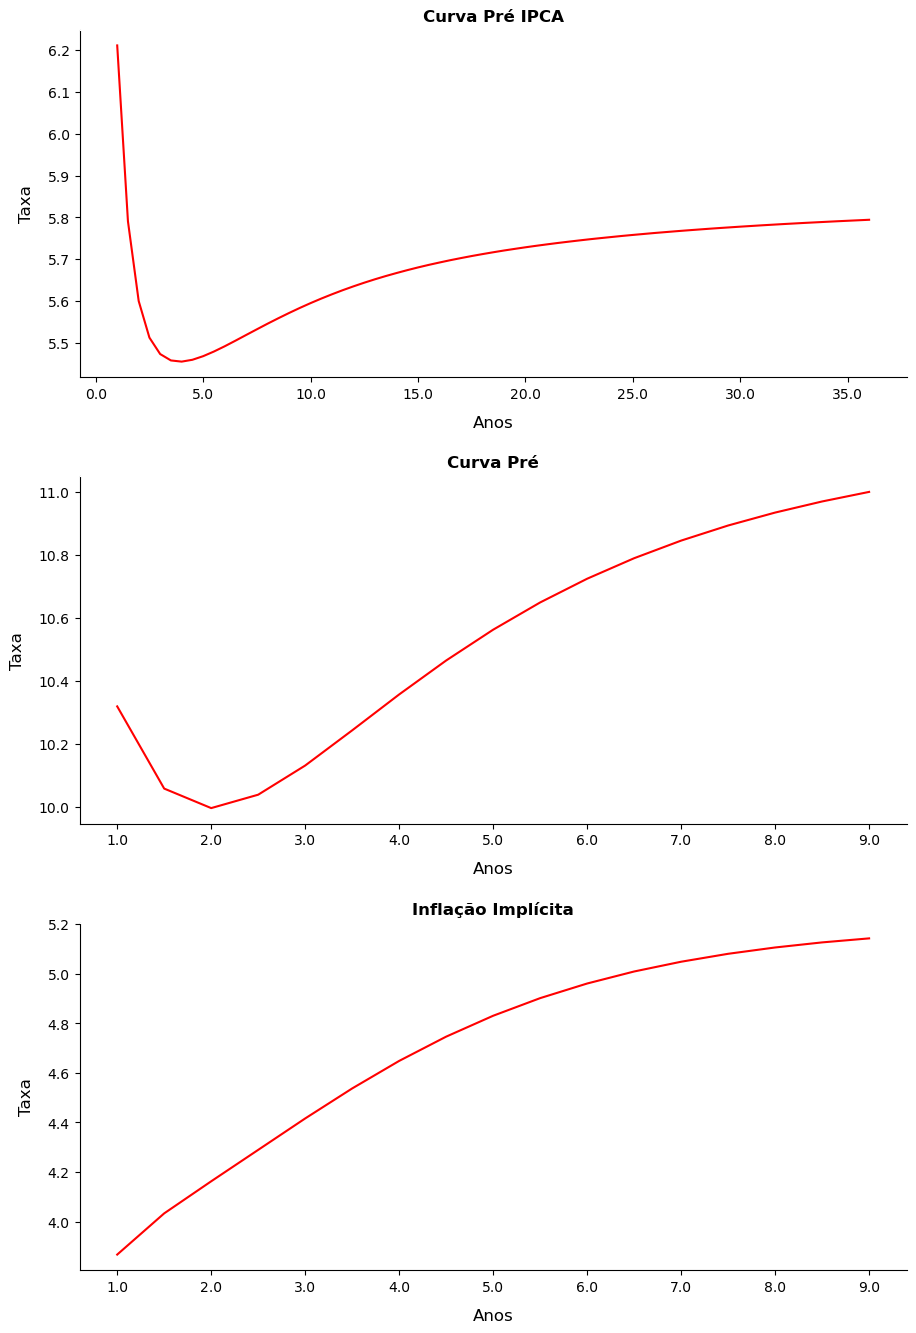

In [147]:
plt.style.use('default')
fig, ax = plt.subplots(3, 1, figsize = (9, 13))
fig.tight_layout(h_pad = 5.0)

cor_fundo = 'black'
cor_linha = 'red'
cor_letras = 'white'

for i, coluna in enumerate(df_anual.columns):
    
    ax[i].set_title(coluna, color = cor_letras, fontweight = 'bold')
    ax[i].plot(df_anual.index, df_anual[coluna].values, color = cor_linha)
    
    ax[i].set_facecolor(cor_fundo)
    fig.patch.set_facecolor(cor_fundo)

    ax[i].tick_params(labelcolor = cor_letras)
    ax[i].xaxis.set_major_formatter(mtick.FormatStrFormatter('%.1f'))
  
    ax[i].set_ylabel('Taxa', fontsize = 12, labelpad = 10, color = cor_letras)
    ax[i].set_xlabel('Anos', fontsize = 12, labelpad = 10, color = cor_letras)
    
    ax[i].spines['left'].set_color(cor_letras)
    ax[i].spines['bottom'].set_color(cor_letras)
    ax[i].spines['right'].set_color(cor_fundo)
    ax[i].spines['top'].set_color(cor_fundo)